<a href="https://colab.research.google.com/github/AmberMynott/AmberMynott-DataScience-GenAI-Submissions/blob/main/Assessment_practice/Practice_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'm first going upload my dataset into a data frame using the following prompt in genai "create a data frame called df using the data set EDA-DP.csv"

In [22]:
import pandas as pd

df = pd.read_csv('/content/EDA-DP.csv')

display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


Everything looks good so I'll now proceed to looking at the data quality and if there are any substantial missing data values.

In [6]:
df.shape


(16534, 11)

This tells us that our data frame has 11 columns with 16534 rows.

Now I'm going to look at the data type for these columns and see if we have missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


This tells us that all of the columns have 16534 non-null values. From our previous line of code, we know that in total we have 16534 rows so this means that we have no missing values in our data frame. We have 4 columns that are of int64 type (64 bit integers) while the rest of objects (strings). Having a glance over our column titles, it appears that all the columns that we would expect to have a numerical value area int64 which is good.

Before doing any analysis, I'm going to check if we have any duplicate rows that I would then need to discount. I'm going to do this using code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/2_05_Exploratory_Data_Analysis.ipynb

In [8]:
df.duplicated().value_counts()


,count
False,10113
True,6421


This tells us that we have 6421 repeated rows. To prevent these repeated rows from skewing our analysis, I am going to remove them.

In order to do this, I'm going to use the genai prompt "for each row that is repeated in df, remove one of the rows so that we're left with only unique rows"

In [17]:
df = df.drop_duplicates()

display(df.shape)

(10113, 11)

This now tells us that we now have 10113 rows instead of the original 16534. I'm now going to repeat the line of code from before to double check that we now have no repeated rows.

In [10]:
df.duplicated().value_counts()


,count
False,10113


As expected, this tells us we now have no repeated rows.

I'm now going to create summary statistcs for the numerical values in our data frame.

In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,10113.000000,1.011300e+04,10113.000000,10113.000000
mean,2023.227529,1.698129e+05,146662.179571,35.553248
std,0.783372,4.321347e+05,72697.319441,47.227660
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.577600e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138750.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


I'm now going to do some analysis on this data. When using salary data, I'm going to be using the salary_in_USD instead of salaray to keep my results consistent.

The standard deviation for salary_in_USD is very high, suggesting there's a wide spread within the data. I'm going to do some further calculations to look if there are any potential outliers. In order to visualise this, I'm going to create a histograme and boxplot for the values of salary_in_USD using code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/3_0X_Statistical_Exploratory_Data_Analysis.ipynb

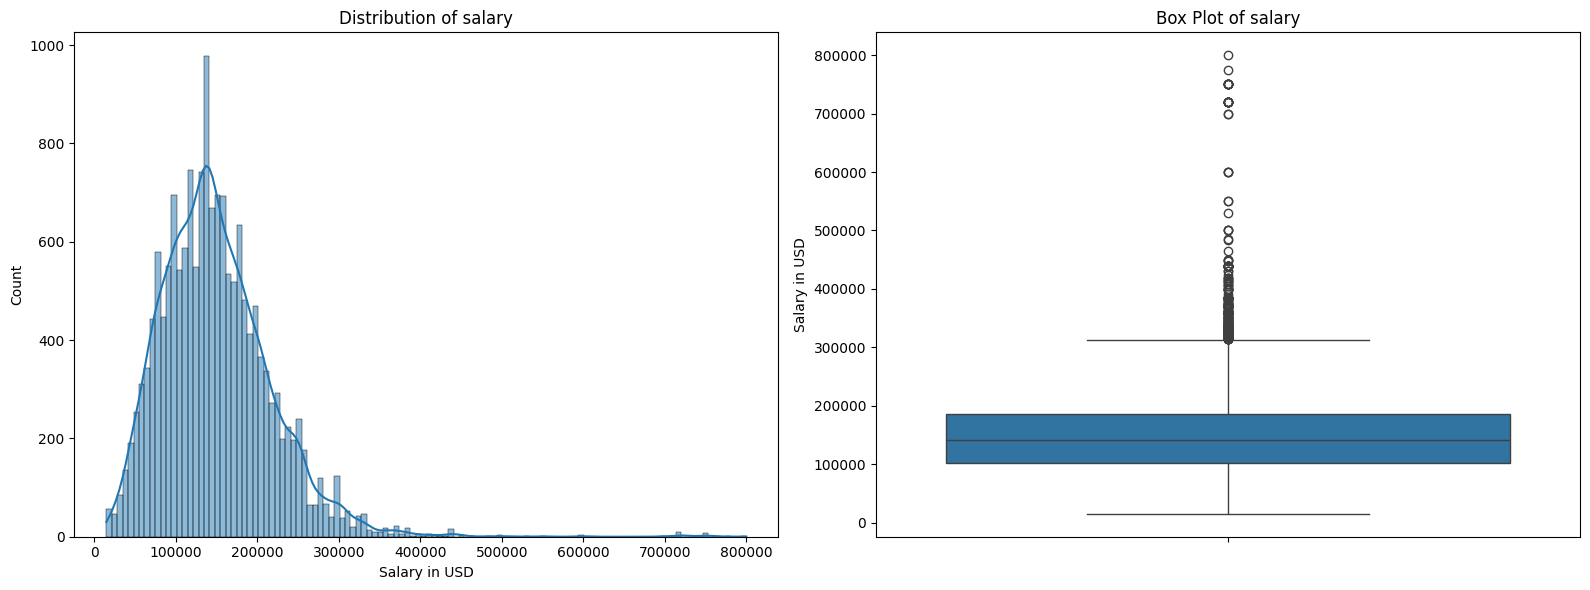

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Salary Histplot
sns.histplot(df['salary_in_usd'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of salary')
axes[0].set_xlabel('Salary in USD')

# Salary Boxplot
sns.boxplot(y=df['salary_in_usd'].dropna(), ax=axes[1])
axes[1].set_title('Box Plot of salary')
axes[1].set_ylabel('Salary in USD')

plt.tight_layout() # Added for better spacing
plt.show()

This clearly shows us that we have some large outliers. In a real world setting, I would then consult a data scientist to investigate these values to see if they were errors that need correcting or naturally high salaries. The answer to this would then influence our decision on how to treat these outliers i.e. whether we remove them, transform them or keep them.
I'm going to investigate the other properties for the employees that have the highest salaries. I'm going to do this using the genai prompt "print the rows with the 20 highest salary_in_usd values, in descending order of salary_in_usd"

In [40]:
display(df.sort_values(by='salary_in_usd', ascending=False).head(20))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2804,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
3647,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
7498,2023,SE,FT,Data Scientist,750000,USD,750000,US,0,US,M
6412,2023,MI,FT,Machine Learning Engineer,750000,USD,750000,US,0,US,M
5808,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
7390,2023,MI,FT,Data Engineer,750000,USD,750000,US,0,US,M
6406,2023,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
4622,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M
5033,2024,SE,FT,Data Analyst,750000,USD,750000,US,0,US,M
4446,2024,SE,FT,Analytics Engineer,750000,USD,750000,US,0,US,M


I'm going to see how salary varies within employee_residence to see if this could help us identify if any of these are errors.

/tmp/ipython-input-3817025324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, palette='viridis')


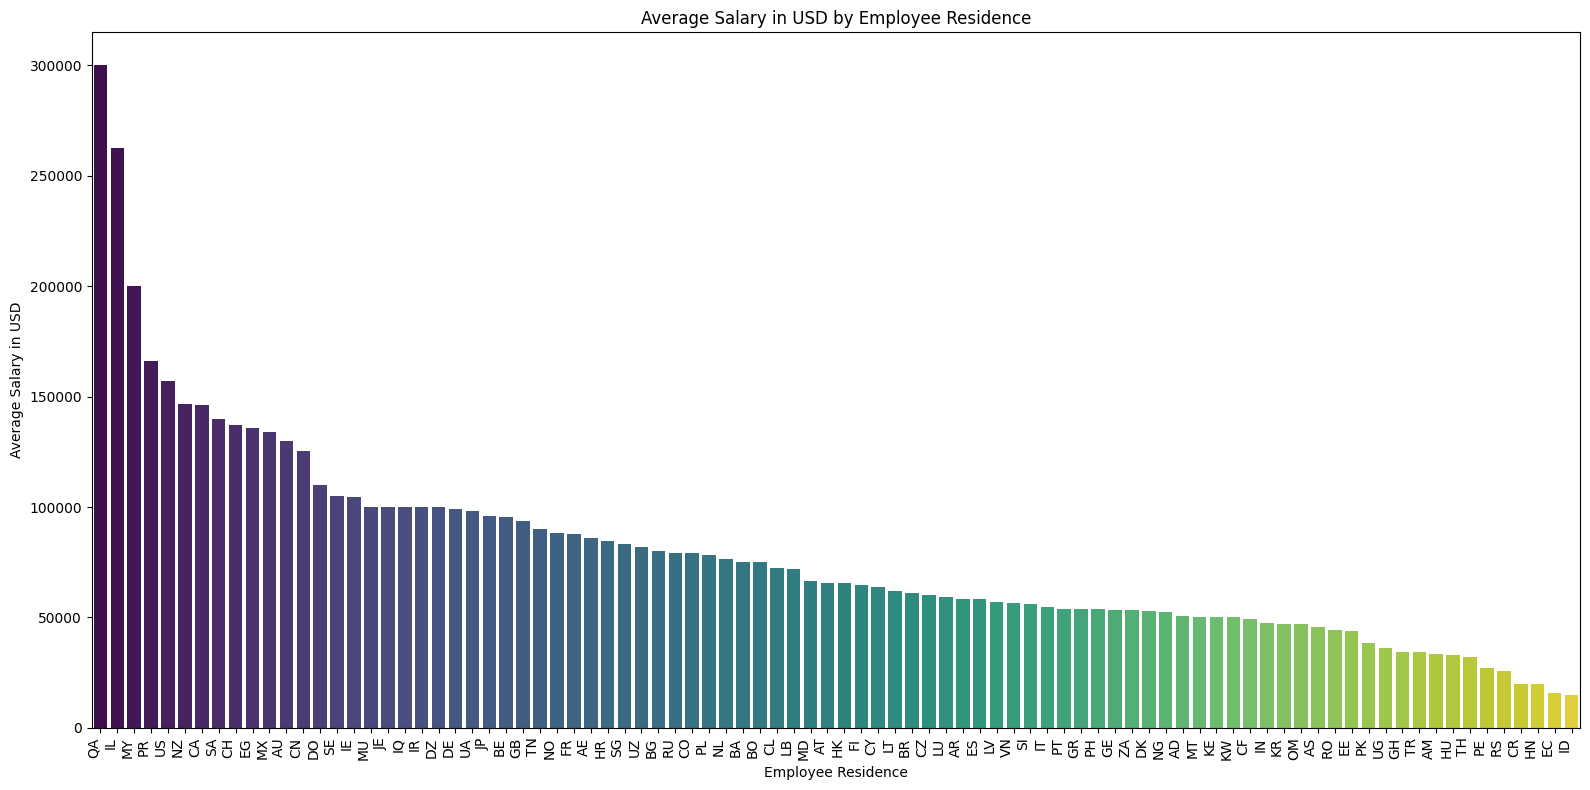

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average salary for each employee residence, and sort them
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(16, 8)) # Adjust figure size to accommodate many labels
sns.barplot(x=avg_salary_by_residence.index, y=avg_salary_by_residence.values, palette='viridis')
plt.xlabel('Employee Residence')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary in USD by Employee Residence')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

This plot shows that the average salary for employees in CA is significantly higher than in any country, however, looking at the residence for the 20 employees with the highest salaries, only one of them is from CA. This indicates that is value is potentially more likely to be an error.
Past the 5 countries with the highest average salary, there is a steady decrease.

To look further into this, I'm going to create a heatmap to compare employee_residence with experience_level. To do this, I'm going to use code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/3_0X_Statistical_Exploratory_Data_Analysis.ipynb

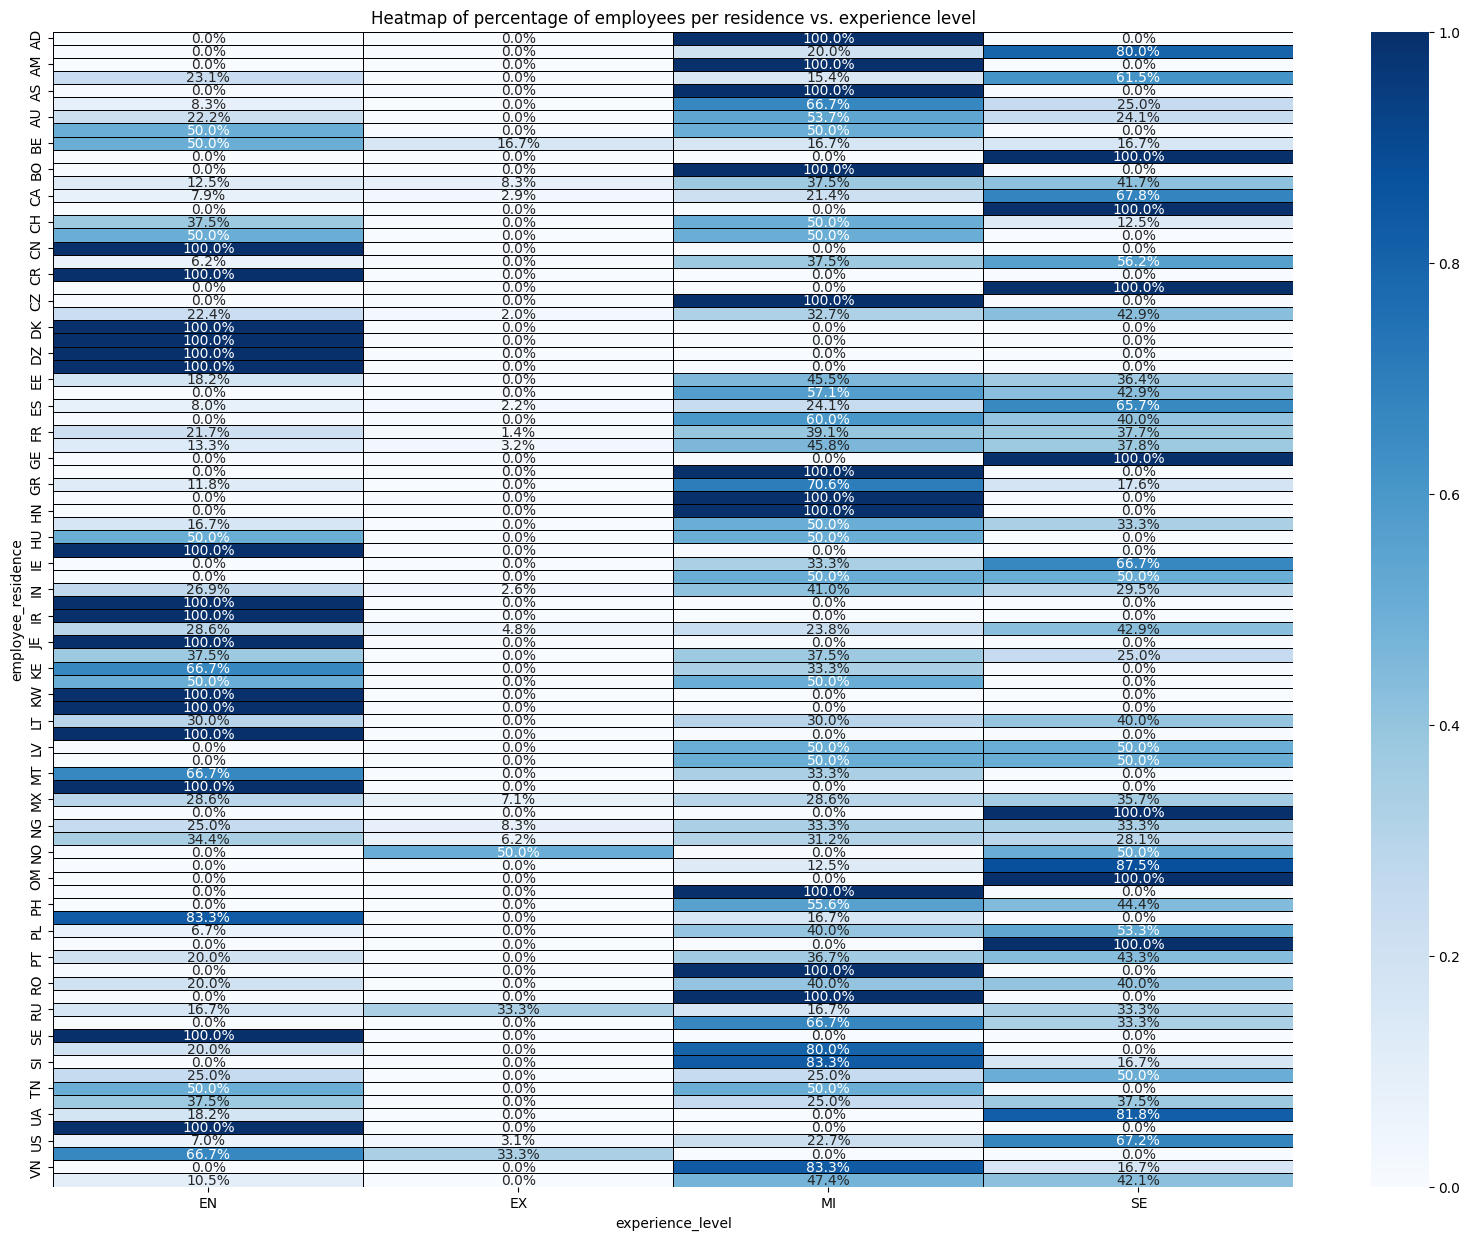

In [41]:
cross_tab_counts = pd.crosstab(df['employee_residence'], df['experience_level'])

# Calculate percentages per row (employee_residence)
cross_tab_percentages = cross_tab_counts.apply(lambda r: r/r.sum(), axis=1)

plt.figure(figsize=(20, 15)) # Increased figure size for better readability
sns.heatmap(cross_tab_percentages, annot=True, fmt='.1%', cmap='Blues', linewidths=.5, linecolor='black') # fmt='.1%' for percentage format
plt.title('Heatmap of percentage of employees per residence vs. experience level')
plt.xlabel('experience_level')
plt.ylabel('employee_residence')
plt.show()

While this plot doesn't give us too much information, it shows that US has a lot of employees in total, with a large proportion of them being "SE" i.e. the highest level of experience. This aligns with the fact that 18 of the 20 highest paid employees were in the US. Interestingly, most regions have a fairly low percentage of their employees at executive level.

I'm going to create a plot that compares salary to job_title. I'm going to create a bar chart for this. But before doing so, I'm going to see how many different values are in the job_title column using the genai prompt "print the different values that are in the job_title column of df"

In [18]:
print(df['job_title'].unique())

['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science' 'Data Specialist'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'AI Software Engineer'
 'Machine Learning Scientist' 'Data Science Engineer'
 'Machine Learning Operations Engineer' 'Analytics Engineer'
 'Data Management Analyst' 'Encounter Data Management Professional'
 'Data Analytics Specialist' 'Head of Data' 'Data Analytics Lead'
 'Research Engineer' 'AI Scientist' 'Business Intelligence Developer'
 'Machine Learning Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'BI Developer' 'Admin & Data Analyst'
 'Insight

There are lots of different values of job_title! As a result of this, it would be hard to read a graph that displays this information so, instead, I am going to create a bar chart that compares salary_in_USD with experience_level. Before doing this, you would expect that salaries of executives are generally higher than those of people in entry level positions. I'm going to use the genai prompt "create a bar chart that compares salary_in_USD from df with experience_level in df"

/tmp/ipython-input-3185282226.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette='plasma')


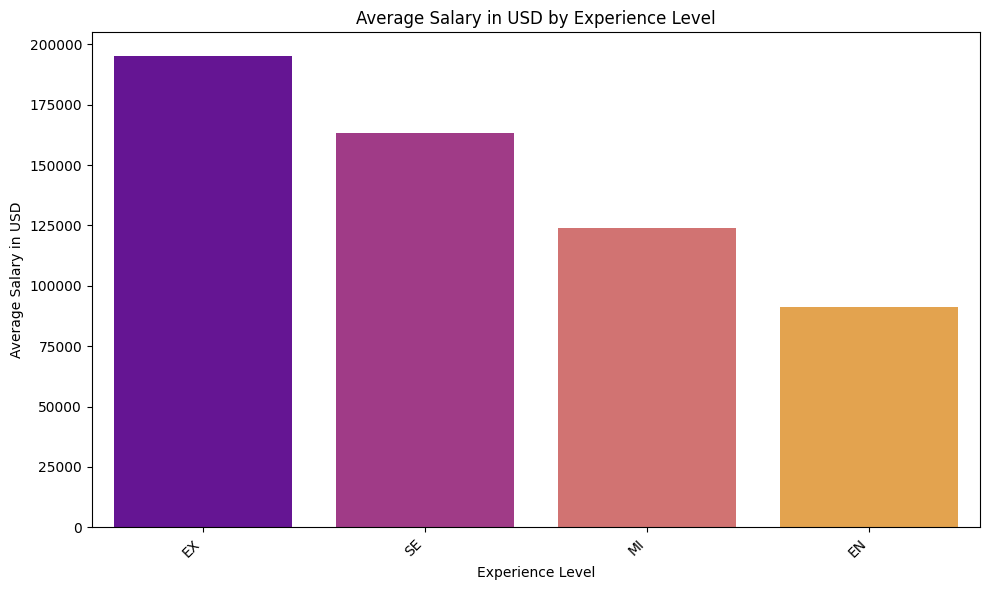

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average salary for each experience level
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette='plasma')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary in USD by Experience Level')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

This graphs shows what we would expect, with salary decreasing from executive to entry level.

Furthering this analysis, I'm going to also compare this the employment_type

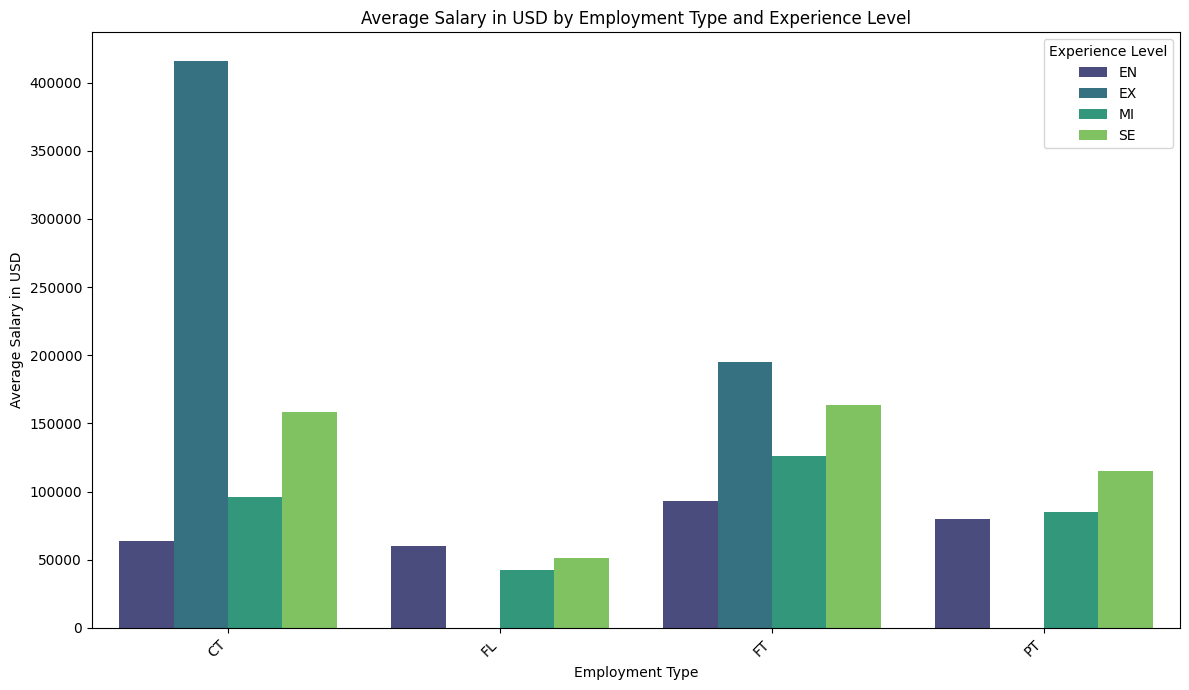

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average salary for each combination of employment_type and experience_level
avg_salary_combo = df.groupby(['employment_type', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='employment_type', y='salary_in_usd', hue='experience_level', data=avg_salary_combo, palette='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary in USD by Employment Type and Experience Level')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()

This shows that the highest average salary is amongst mid-level employees who do contract work (this is the maximum by quite some distance). It's worth noting that this graph has some missing bars. I'm going to investigate whether that is because the salaries are so low that it doesn't show up well with the scale of the axes or if it's because there are no employees at that specific experience level and employment type.

I'm going to do this using the genai prompt "count the number of rows that an an employment_type = FL and experience_level = ML" and then repeat this for the differfent combinations

In [44]:
count_fl_ml = df[(df['employment_type'] == 'FL') & (df['experience_level'] == 'ML')].shape[0]
print(f"Number of rows with employment_type = 'FL' and experience_level = 'ML': {count_fl_ml}")

Number of rows with employment_type = 'FL' and experience_level = 'ML': 0


In [45]:
count_pt_ml = df[(df['employment_type'] == 'PT') & (df['experience_level'] == 'ML')].shape[0]
print(f"Number of rows with employment_type = 'PT' and experience_level = 'ML': {count_pt_ml}")

Number of rows with employment_type = 'PT' and experience_level = 'ML': 0


As expected, both these values are zero.